In [1]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import numpy as np

# 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

OX리스트의 첫 번째 항목:
XOOXOOXXOXOXOXXOOXOOOXOOXXXOXOOOOOOXOOXOOXOXXXOOOO

OX리스트의 데이터 타입: <class 'str'>
각 문항의 정답률:
문항 번호
1     0.500000
2     0.500000
3     0.333333
4     0.533333
5     0.600000
6     0.466667
7     0.466667
8     0.400000
9     0.533333
10    0.533333
11    0.566667
12    0.466667
13    0.533333
14    0.400000
15    0.466667
16    0.433333
17    0.433333
18    0.533333
19    0.500000
20    0.600000
21    0.466667
22    0.433333
23    0.466667
24    0.500000
25    0.666667
26    0.600000
27    0.500000
28    0.766667
29    0.366667
30    0.500000
31    0.500000
32    0.533333
33    0.500000
34    0.433333
35    0.633333
36    0.566667
37    0.700000
38    0.500000
39    0.466667
40    0.600000
41    0.433333
42    0.633333
43    0.500000
44    0.566667
45    0.466667
46    0.300000
47    0.500000
48    0.466667
49    0.533333
50    0.566667
dtype: float64

정답률 통계:
count    50.000000
mean      0.509333
std       0.087298
min       0.300000
25%       0.466667
50%       0.50000

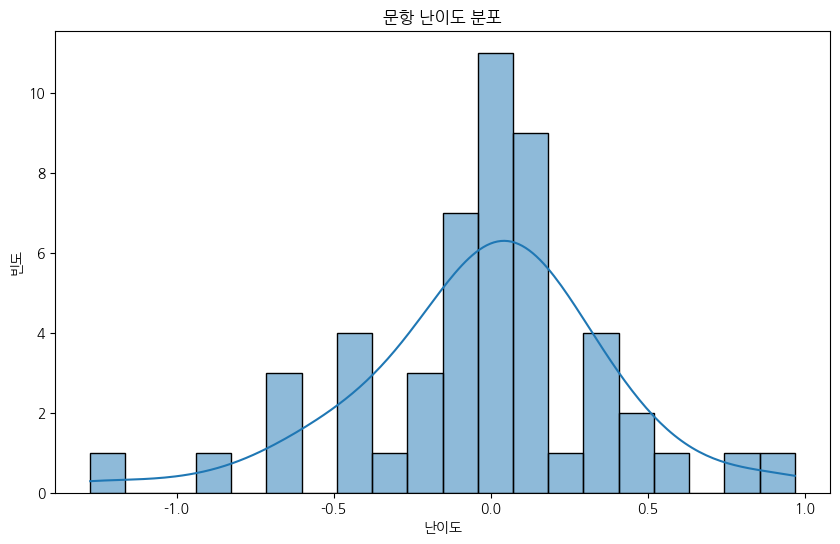

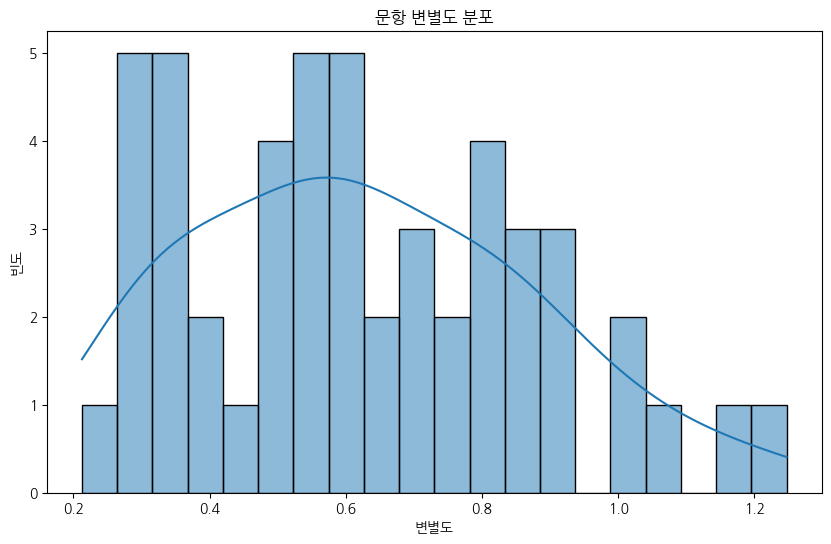

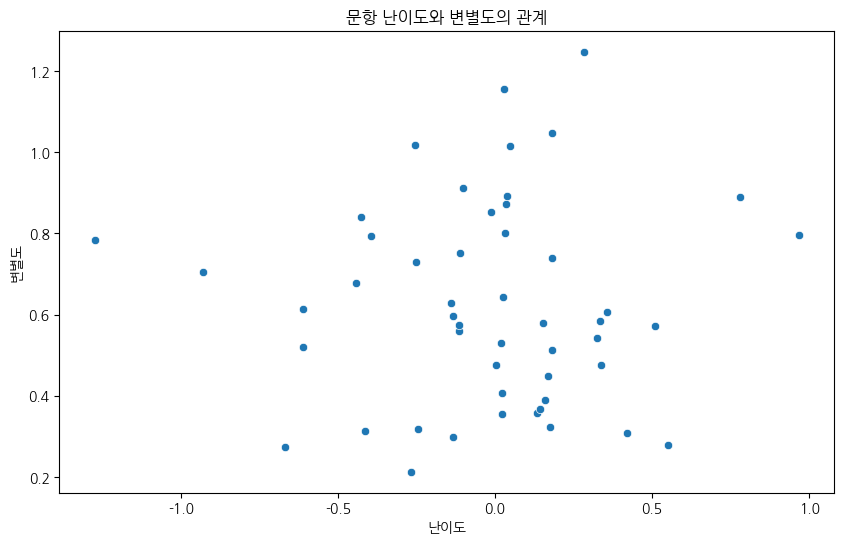

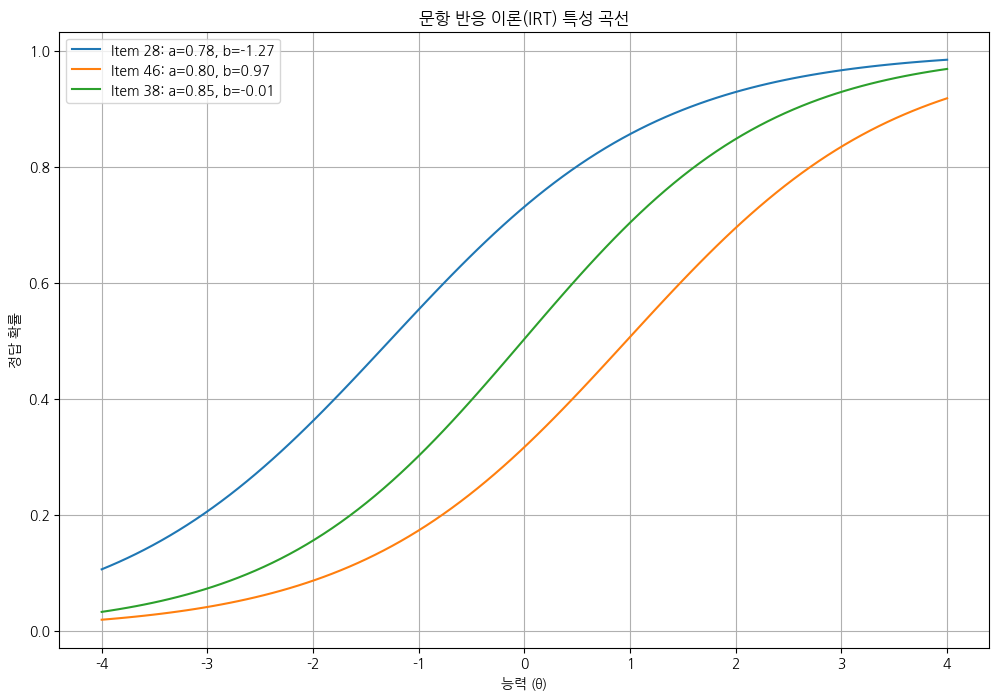

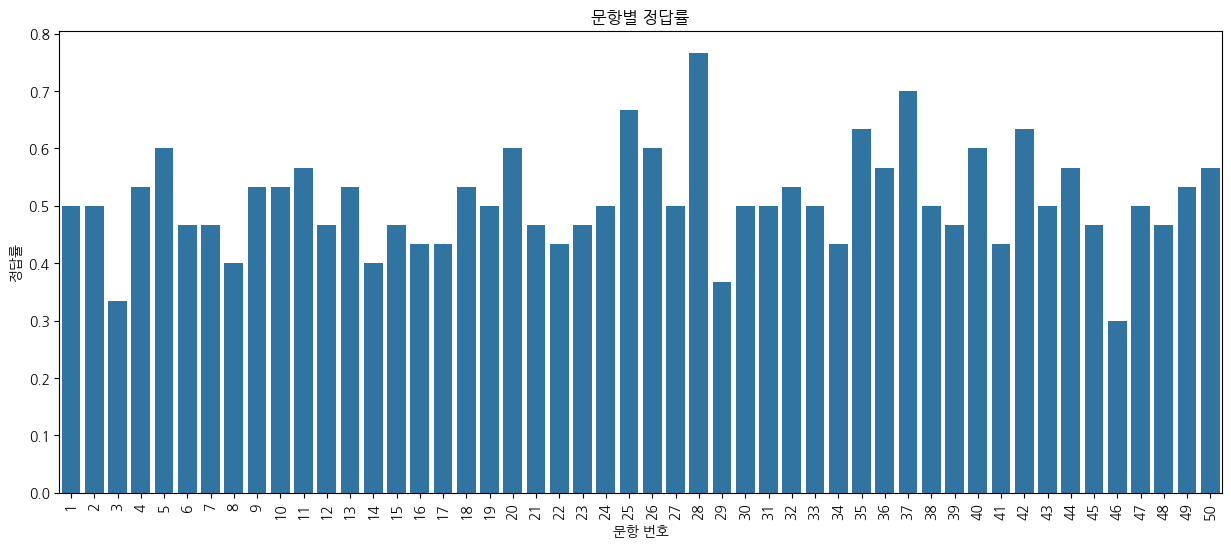


가장 높은 정답률을 가진 문항: 28, 정답률: 0.77
가장 낮은 정답률을 가진 문항: 46, 정답률: 0.30

정답률과 난이도의 상관계수: -1.00
p-value: 0.0000


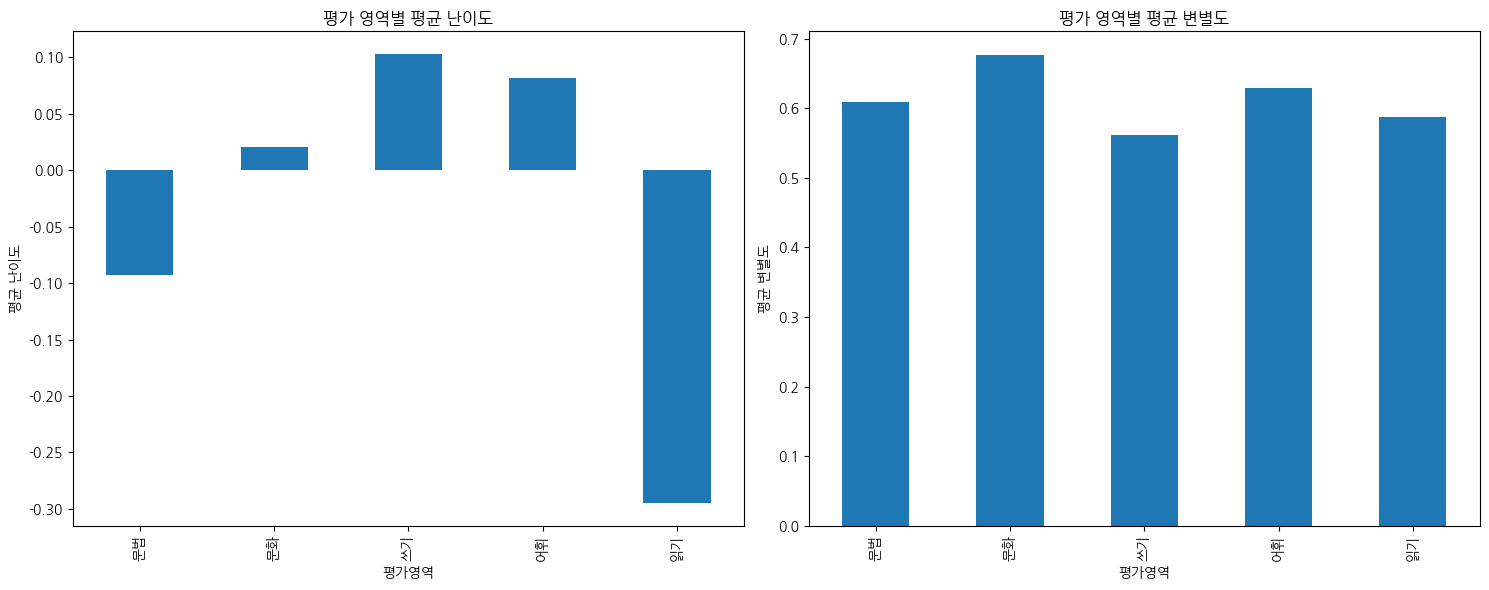

난이도와 변별도의 상관계수: 0.01
p-value: 0.9222

문항 분석 요약 통계:
             난이도        변별도
count  50.000000  50.000000
mean   -0.021052   0.623589
std     0.399203   0.249466
min    -1.274760   0.212743
25%    -0.219678   0.417486
50%     0.025111   0.590480
75%     0.178278   0.795160
max     0.967968   1.247425

가장 어려운 문항:
문항 번호          46
변별도      0.795629
난이도      0.967968
문제번호           46
평가영역           문화
Name: 45, dtype: object

가장 쉬운 문항:
문항 번호          28
변별도      0.783528
난이도      -1.27476
문제번호           28
평가영역           문법
Name: 27, dtype: object

가장 높은 변별도를 가진 문항:
문항 번호          16
변별도      1.247425
난이도      0.281426
문제번호           16
평가영역           문법
Name: 15, dtype: object

가장 낮은 변별도를 가진 문항:
문항 번호          50
변별도      0.212743
난이도     -0.266711
문제번호           50
평가영역           문화
Name: 49, dtype: object


In [9]:
# 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import logistic
import numpy as np

# 데이터 로드 (CSV 파일로 저장되어 있다고 가정)
item_data = pd.read_csv('../문항_매개변수.csv')
response_data = pd.read_csv('../응답_데이터.csv')
test_structure = pd.read_csv('../exam1.csv')

# 데이터 전처리
item_data = item_data.rename(columns={'변별도 (alpha)': '변별도', '난이도 (beta)': '난이도'})
item_data = pd.merge(item_data, test_structure[['문제번호', '평가영역']], left_on='문항 번호', right_on='문제번호')

# 'OX리스트' 데이터 구조 확인
print("OX리스트의 첫 번째 항목:")
print(response_data['OX리스트'].iloc[0])
print("\nOX리스트의 데이터 타입:", type(response_data['OX리스트'].iloc[0]))

# 정답률 계산 함수
def calculate_correct_rate(ox_list):
    return sum(1 for char in ox_list if char == 'O') / len(ox_list)

# 각 문항별 정답률 계산
item_correct_rates = []
for i in range(len(response_data['OX리스트'].iloc[0])):
    column = response_data['OX리스트'].apply(lambda x: x[i])
    item_correct_rates.append(calculate_correct_rate(column))

item_correct_rates = pd.Series(item_correct_rates, index=item_data['문항 번호'])

# 정답률 확인
print("각 문항의 정답률:")
print(item_correct_rates)

# 정답률 통계
print("\n정답률 통계:")
print(item_correct_rates.describe())

# 1. 문항 난이도 분포 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(item_data['난이도'], bins=20, kde=True)
plt.title('문항 난이도 분포')
plt.xlabel('난이도')
plt.ylabel('빈도')
plt.show()

# 2. 문항 변별도 분포 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(item_data['변별도'], bins=20, kde=True)
plt.title('문항 변별도 분포')
plt.xlabel('변별도')
plt.ylabel('빈도')
plt.show()

# 3. 문항 난이도와 변별도의 산점도
plt.figure(figsize=(10, 6))
sns.scatterplot(data=item_data, x='난이도', y='변별도')
plt.title('문항 난이도와 변별도의 관계')
plt.xlabel('난이도')
plt.ylabel('변별도')
plt.show()

# 4. 문항 반응 이론(IRT) 특성 곡선
def item_response_function(theta, a, b):
    return logistic.cdf(a * (theta - b))

# 능력 범위 설정
theta = np.linspace(-4, 4, 100)

# 몇 개의 대표적인 문항 선택 (예: 가장 쉬운 문항, 가장 어려운 문항, 중간 난이도 문항)
items_to_plot = [
    item_data.loc[item_data['난이도'].idxmin()],  # 가장 쉬운 문항
    item_data.loc[item_data['난이도'].idxmax()],  # 가장 어려운 문항
    item_data.loc[(item_data['난이도'] - item_data['난이도'].mean()).abs().idxmin()]  # 중간 난이도 문항
]

plt.figure(figsize=(12, 8))
for item in items_to_plot:
    a, b = item['변별도'], item['난이도']
    probabilities = item_response_function(theta, a, b)
    plt.plot(theta, probabilities, label=f'Item {item["문항 번호"]}: a={a:.2f}, b={b:.2f}')

plt.title('문항 반응 이론(IRT) 특성 곡선')
plt.xlabel('능력 (θ)')
plt.ylabel('정답 확률')
plt.legend()
plt.grid(True)
plt.show()

# 5. 문항별 정답률 막대 그래프
plt.figure(figsize=(15, 6))
sns.barplot(x=item_correct_rates.index, y=item_correct_rates.values)
plt.title('문항별 정답률')
plt.xlabel('문항 번호')
plt.ylabel('정답률')
plt.xticks(rotation=90)
plt.show()

# 가장 높은/낮은 정답률을 가진 문항 식별
highest_correct_rate_item = item_correct_rates.idxmax()
lowest_correct_rate_item = item_correct_rates.idxmin()

print(f"\n가장 높은 정답률을 가진 문항: {highest_correct_rate_item}, 정답률: {item_correct_rates[highest_correct_rate_item]:.2f}")
print(f"가장 낮은 정답률을 가진 문항: {lowest_correct_rate_item}, 정답률: {item_correct_rates[lowest_correct_rate_item]:.2f}")

# 정답률과 난이도의 상관관계
correlation, p_value = stats.pearsonr(item_correct_rates, item_data.set_index('문항 번호')['난이도'])
print(f"\n정답률과 난이도의 상관계수: {correlation:.2f}")
print(f"p-value: {p_value:.4f}")

# 6. 평가 영역별 평균 난이도/변별도 비교
avg_difficulty = item_data.groupby('평가영역')['난이도'].mean()
avg_discrimination = item_data.groupby('평가영역')['변별도'].mean()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

avg_difficulty.plot(kind='bar', ax=ax1)
ax1.set_title('평가 영역별 평균 난이도')
ax1.set_ylabel('평균 난이도')

avg_discrimination.plot(kind='bar', ax=ax2)
ax2.set_title('평가 영역별 평균 변별도')
ax2.set_ylabel('평균 변별도')

plt.tight_layout()
plt.show()

# 추가 분석: 난이도와 변별도의 상관관계
correlation, p_value = stats.pearsonr(item_data['난이도'], item_data['변별도'])
print(f"난이도와 변별도의 상관계수: {correlation:.2f}")
print(f"p-value: {p_value:.4f}")

# 문항 분석 요약 통계
summary_stats = item_data[['난이도', '변별도']].describe()
print("\n문항 분석 요약 통계:")
print(summary_stats)

# 가장 어려운/쉬운 문항, 가장 높은/낮은 변별도를 가진 문항 식별
hardest_item = item_data.loc[item_data['난이도'].idxmax()]
easiest_item = item_data.loc[item_data['난이도'].idxmin()]
most_discriminating = item_data.loc[item_data['변별도'].idxmax()]
least_discriminating = item_data.loc[item_data['변별도'].idxmin()]

print("\n가장 어려운 문항:")
print(hardest_item)
print("\n가장 쉬운 문항:")
print(easiest_item)
print("\n가장 높은 변별도를 가진 문항:")
print(most_discriminating)
print("\n가장 낮은 변별도를 가진 문항:")
print(least_discriminating)